In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from collections  import Counter
sns.set_palette(sns.diverging_palette(220, 20, n=7))
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from pycaret.regression import *

In [3]:
df = pd.read_csv('../Addprediction/dataset/data.csv')

In [ ]:
exp_reg101 = setup(data =df, target = 'cpm_multiindex', session_id=123,normalize = True, 
                   transformation = True, transform_target = True)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:10:46
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Unnamed: 0,ID Column
site_id,Categorical
ad_type_id,Categorical
geo_id,Numeric
device_category_id,Categorical
os_id,Categorical
monetization_channel_id,Categorical
ad_unit_id,Numeric
total_impressions,Numeric
total_revenue,Numeric


In [7]:
# tree methods won't be effective also saving time
blacklist = ['dt','rf','et','ada','gbr','mlp','xgboost','lightgbm','catboost','tr','ransac','par','svm','huber']

In [7]:
compare_models(blacklist = blacklist, fold = 8,  round = 4,  sort = 'MAPE', turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.180000,0.151000,0.388600,0.450400,0.208800,0.356300
1,Linear Regression,0.242100,0.206600,0.454600,0.248000,0.238500,0.531300
2,Least Angle Regression,0.242100,0.206600,0.454500,0.248300,0.238500,0.531300
3,Ridge Regression,0.242200,0.215300,0.463600,0.215900,0.238500,0.531400
4,Bayesian Ridge,0.242200,0.215200,0.463500,0.216800,0.238500,0.531400
5,Orthogonal Matching Pursuit,0.258900,0.219600,0.468600,0.200800,0.252400,0.568000
6,Lasso Regression,0.314200,0.305300,0.552500,-0.111000,0.312500,0.647300
7,Elastic Net,0.314200,0.305300,0.552500,-0.111000,0.312500,0.647300
8,Lasso Least Angle Regression,0.314200,0.305300,0.552500,-0.111000,0.312500,0.647300


In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2403,0.2040,0.4516,0.2456,0.2373,0.5306
1,0.2424,0.2135,0.4620,0.2216,0.2383,0.5332
2,0.2413,0.2033,0.4509,0.2571,0.2374,0.5305
3,0.2384,0.2023,0.4498,0.2481,0.2361,0.5276
4,0.2464,0.2518,0.5018,0.1121,0.2414,0.5338
5,0.2400,0.2034,0.4510,0.2530,0.2366,0.5276
6,0.2438,0.2151,0.4638,0.2362,0.2402,0.5332
7,0.2428,0.2025,0.4500,0.2609,0.2390,0.5313
8,0.2411,0.2027,0.4502,0.2559,0.2378,0.5303
9,0.2460,0.2148,0.4635,0.2237,0.2415,0.5362


In [9]:
tuned_lr = tune_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2399,0.2015,0.4489,0.2548,0.2372,0.5298
1,0.2428,0.2162,0.4650,0.2116,0.2385,0.5335
2,0.2413,0.2034,0.4510,0.2566,0.2376,0.5311
3,0.2385,0.2019,0.4493,0.2498,0.2359,0.5272
4,0.2453,0.2157,0.4644,0.2394,0.2408,0.5324
5,0.2398,0.2024,0.4499,0.2567,0.2365,0.5271
6,0.2439,0.2132,0.4617,0.2429,0.2400,0.5343
7,0.2428,0.2025,0.4501,0.2607,0.2390,0.5315
8,0.2421,0.2403,0.4902,0.1179,0.2382,0.5312
9,0.2461,0.2143,0.4630,0.2253,0.2415,0.5364


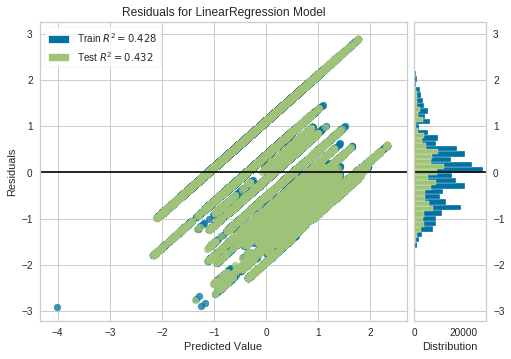

In [10]:
plot_model(tuned_lr)

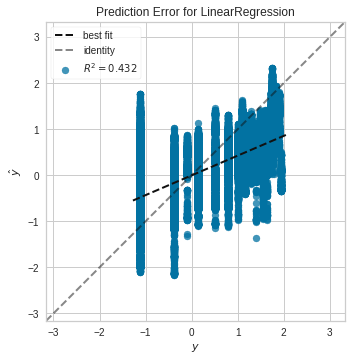

In [11]:
plot_model(tuned_lr, plot = 'error')

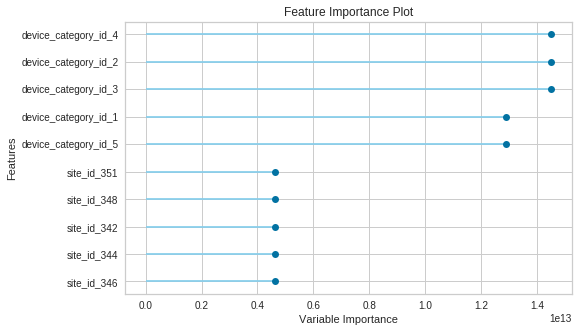

In [12]:
plot_model(tuned_lr, plot='feature')

In [13]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
predict_model(tuned_lr);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2417,0.2079,0.456,0.2417,0.2381,0.5292


In [15]:
final_lr = finalize_model(tuned_lr)

In [17]:
save_model(final_lr,'FinalLinearRegModel')

Transformation Pipeline and Model Succesfully Saved


In [18]:
save_experiment('Experiment_123 p1')

Experiment Succesfully Saved


## knn

In [ ]:
knn = create_model('knn')
tuned_knn = tune_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1796,0.1504,0.3879,0.4436,0.2085,0.3577
1,0.1798,0.1499,0.3872,0.4534,0.2081,0.3573
2,0.1804,0.1506,0.3881,0.4496,0.2081,0.3571
3,0.1747,0.1437,0.3790,0.4661,0.2054,0.3512
4,0.1823,0.1556,0.3944,0.4514,0.2100,0.3570
5,0.1792,0.1491,0.3861,0.4524,0.2083,0.3562
6,0.1799,0.1541,0.3925,0.4528,0.2096,0.3541
7,0.1798,0.1502,0.3876,0.4516,0.2085,0.3546
8,0.1792,0.1501,0.3874,0.4490,0.2084,0.3575
9,0.1823,0.1530,0.3912,0.4469,0.2100,0.3592


IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:24:25
Status,. . . . . . . . . . . . . . . . . .,Tuning Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [ ]:
predict_model(tuned_knn);
final_knn = finalize_model(tuned_knn)
save_model(final_knn,'FinalLinearRegModel')

In [ ]:
plot_model(tuned_knn)

In [ ]:
plot_model(tuned_knn, plot='feature')

In [ ]:
evaluate_model(tuned_knn)

In [ ]:
interpret_model(tuned_knn)

## Ridge

In [ ]:
ridge = create_model('ridge')
tuned_ridge = tune_model('ridge')

In [ ]:
predict_model(tuned_ridge);
final_ridge = finalize_model(tuned_ridge)
save_model(final_ridge,'FinalridgeModel')

## lasso

In [ ]:
lasso = create_model('lasso')
tuned_lasso = tune_model('lasso')

In [ ]:
predict_model(tuned_lasso);
final_ridge = finalize_model(tuned_lasso)
save_model(final_lasso,'FinallassoModel')

## least angle reg

In [ ]:
lar = create_model('lar')
tuned_lar = tune_model('lar')

In [ ]:
predict_model(tuned_lar);
final_lar = finalize_model(tuned_lar)
save_model(final_lar,'FinallarModel')

## bayesian ridge

In [ ]:
br = create_model('br')
tuned_br = tune_model('br')

In [ ]:
predict_model(tuned_br);
final_br = finalize_model(tuned_br)
save_model(final_br,'FinalbrModel')

## model blending

In [ ]:
blend_specific1 = blend_models(estimator_list = [lr,br,knn])

In [ ]:
blend_specific2 = blend_models(estimator_list = [lar,lasso,lr])

## stacking

In [ ]:
stack_1 = stack_models([lr,br,knn])

In [ ]:
stack_2 = stack_models([lar,lasso,lr])

In [ ]:
# final_stack = finalize_model(stack)
# save_model(final_stack,'FinalStackModel')

## stacknet 

In [ ]:
stacknet = create_stacknet(estimator_list =[[lr,br,knn],[lar,lasso,lr]])

In [ ]:
# final_stacknet = finalize_model(stacknet)
# save_model(final_stacknet,'FinalStacknetModel')

In [ ]:
save_experiment('Experiment_123 2June1830')

In [ ]:
#saved_experiment = load_experiment('Experiment_123 ****')
#saved_lr = load_model('lr')